In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np 

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 2s 1us/step


In [3]:
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i in range (len(sequences)):
        for j in range (len(sequences[i])): 
            results[i][sequences[i][j]] = 1. #to be float
    return results

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

from keras.utils import to_categorical 
one_hot_train_labels = to_categorical(train_labels) 
one_hot_test_labels = to_categorical(test_labels)

In [4]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

2022-10-02 20:23:52.577788: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
16/16 [==============================] - 1s 36ms/step - loss: 2.4753 - accuracy: 0.5205 - val_loss: 1.6325 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.3652 - accuracy: 0.7147 - val_loss: 1.2853 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0403 - accuracy: 0.7803 - val_loss: 1.1421 - val_accuracy: 0.7500
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8278 - accuracy: 0.8269 - val_loss: 1.0403 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6649 - accuracy: 0.8597 - val_loss: 0.9695 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5276 - accuracy: 0.8904 - val_loss: 0.9441 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4299 - accuracy: 0.9105 - val_loss: 0.8957 - val_accuracy: 0.8200
Epoch 8/20
16

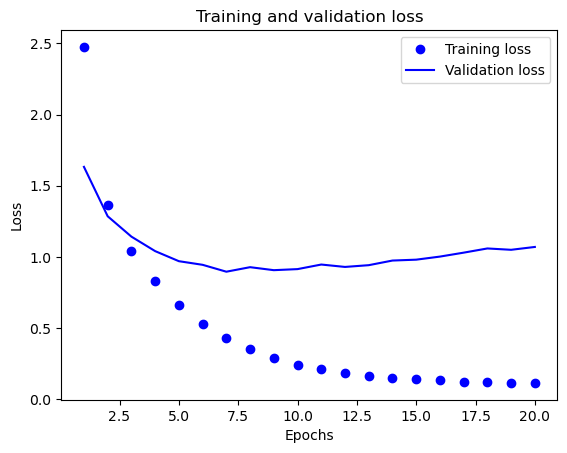

In [5]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()